# Project 3 - Car Insurance Claim Prediction Project

![](https://i.imgur.com/bifxjIA.png)

Dataset Link : https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification

We'll train a machine learning model to predict whether the policyholder will file a claim in the next 6 months or not.

***About Dataset***:
The Dataset is taken from a Kaggle. It contains information on policyholders having the attributes like policy tenure, age of the car, age of the car owner, the population density of the city, make and model of the car, power, engine type, etc, and the target variable indicating whether the policyholder files a claim in the next 6 months or not.

Here's an outline of the project:

1. Download the dataset
2. Explore & analyze the dataset
3. Prepare the dataset for ML training
4. Train hardcoded & baseline models
5. Make predictions & submit to Kaggle
6. Perform feature engineering
7. Train & evaluate different models
8. Tune hyperparameters for the best models
9. Train on a GPU with the entire dataset
10. Document & publish the project online

## 1. Download the Dataset

Steps:

* Install required libraries

* Download data from Kaggle

* View dataset files

* Load training set with Pandas

* Load test set with Pandas

### Install Required Libraries



In [ ]:
!pip install numpy pandas jovian opendatasets scikit-learn xgboost --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


### Download Data from Kaggle

We'll use the opendatasets library to download the dataset.

In [ ]:
import jovian
import opendatasets as od

dataset_url='https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tinnandarliman
Your Kaggle Key: ··········


100%|██████████| 1.96M/1.96M [00:00<00:00, 68.4MB/s]

In [ ]:
%%time
od.download(dataset_url)

Skipping, found downloaded files in "./carinsuranceclaimprediction-classification" (use force=True to force download)
CPU times: user 1.94 ms, sys: 0 ns, total: 1.94 ms
Wall time: 1.95 ms


In [ ]:
data_dir= '/content/carinsuranceclaimprediction-classification'

### View Dataset Files

In [ ]:
# List of files with size
!ls -lh {data_dir}

total 23M
-rw-r--r-- 1 root root 420K May  3 06:00 sample_submission.csv
-rw-r--r-- 1 root root 8.8M May  3 06:00 test.csv
-rw-r--r-- 1 root root  14M May  3 06:00 train.csv


In [ ]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

58593 /content/carinsuranceclaimprediction-classification/train.csv


In [ ]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

39064 /content/carinsuranceclaimprediction-classification/test.csv


In [ ]:
# No. of lines in submission file
!wc -l {data_dir}/sample_submission.csv

39064 /content/carinsuranceclaimprediction-classification/sample_submission.csv


In [ ]:
# Training set
!head {data_dir}/train.csv

policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
ID00001,0.515873589958172,0.05,0.644230769230769,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
ID00002,0.672618513547733,0.02,0.375,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power

In [ ]:
# Test set
!head {data_dir}/test.csv

policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
ID58593,0.341731678878033,0,0.586538461538462,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
ID58594,0.307241443301031,0.13,0.442307692307692,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,E

In [ ]:
# Sample submission file
!head {data_dir}/sample_submission.csv

policy_id,is_claim
ID58593,1
ID58594,1
ID58595,1
ID58596,1
ID58597,1
ID58598,1
ID58599,1
ID58600,1
ID58601,1


Observations:

* This is a supervised learning classification problem

* Training data is 13.82 MB in size

* Training data has 58,593 rows

* Test set is much smaller (only 39,064 rows)

* The training set has 44 columns:

    * policy_id
    * policy_tenure (Time period of the policy)
    * age_of_car
    * age_of_policyholder
    * area_cluster
    * population density
    * make
    * segment
    * model
    * fuel_type etc.

* The test set has all columns except the target column 'is_claim'.

* The sample_submission file should contain the 'policy_id', and 'is_claim' for each test sample.

### Loading Training Set

Loading the entire dataset into Pandas using pd.read_csv. Since the dataset is small enough to train for the prediction, i don't need to specify data types for the columns.

In [ ]:
import pandas as pd

In [ ]:
train_df=pd.read_csv(data_dir +'/train.csv')

In [ ]:
train_df.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


### Load Test Set

In [ ]:
test_df = pd.read_csv(data_dir+'/test.csv')

In [ ]:
test_df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,ID97651,0.047982,0.15,0.740385,C2,27003,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
39059,ID97652,1.224838,0.05,0.509615,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
39060,ID97653,0.520287,0.12,0.355769,C6,13051,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0
39061,ID97654,1.172391,0.08,0.644231,C5,34738,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2


## 2. Explore the Dataset

* Basic info about training set

* Basic info about test set

* Exploratory data analysis & visualization

* Ask & answer questions

### Training Set

In [ ]:
train_df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [ ]:
train_df.shape

(58592, 44)

In [ ]:
train_df.size

2578048

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
train_df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [ ]:
train_df.isna()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58588,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58589,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58590,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
train_df.isna().sum().sort_values(ascending= False)

policy_id                           0
policy_tenure                       0
steering_type                       0
turning_radius                      0
length                              0
width                               0
height                              0
gross_weight                        0
is_front_fog_lights                 0
is_rear_window_wiper                0
is_rear_window_washer               0
is_rear_window_defogger             0
is_brake_assist                     0
is_power_door_locks                 0
is_central_locking                  0
is_power_steering                   0
is_driver_seat_height_adjustable    0
is_day_night_rear_view_mirror       0
is_ecw                              0
is_speed_alert                      0
ncap_rating                         0
gear_box                            0
transmission_type                   0
cylinder                            0
max_torque                          0
age_of_car                          0
age_of_polic

In [ ]:
train_df.nunique()

policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

Observations about the training data:

* 55,892 rows total included.
* No missing data (according to the value counts)



### Test Set

In [ ]:
test_df=pd.read_csv('/content/carinsuranceclaimprediction-classification/test.csv')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         39063 non-null  object 
 1   policy_tenure                     39063 non-null  float64
 2   age_of_car                        39063 non-null  float64
 3   age_of_policyholder               39063 non-null  float64
 4   area_cluster                      39063 non-null  object 
 5   population_density                39063 non-null  int64  
 6   make                              39063 non-null  int64  
 7   segment                           39063 non-null  object 
 8   model                             39063 non-null  object 
 9   fuel_type                         39063 non-null  object 
 10  max_torque                        39063 non-null  object 
 11  max_power                         39063 non-null  object 
 12  engi

In [ ]:
test_df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
count,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000,39063.000000
mean,0.611304,0.069635,0.469087,18816.232496,1.763382,3.139672,1160.605842,3.620613,5.245782,4.853222,3849.328981,1671.774979,1553.033203,1384.501677,1.759235
std,0.415005,0.056854,0.122072,17651.942351,1.134112,1.831043,266.942754,0.485241,0.430556,0.228060,312.181174,111.973404,79.030425,212.724627,1.386689
min,0.002745,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000
25%,0.208958,0.020000,0.375000,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000
50%,0.574078,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000
75%,1.040936,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000
max,1.391398,1.000000,0.990385,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000


### Exploratory Data Analysis and Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.figsize']= (12,6)
matplotlib.rcParams['figure.facecolor']= '#00000000'

#### Exploration for Car's Segment Comparison

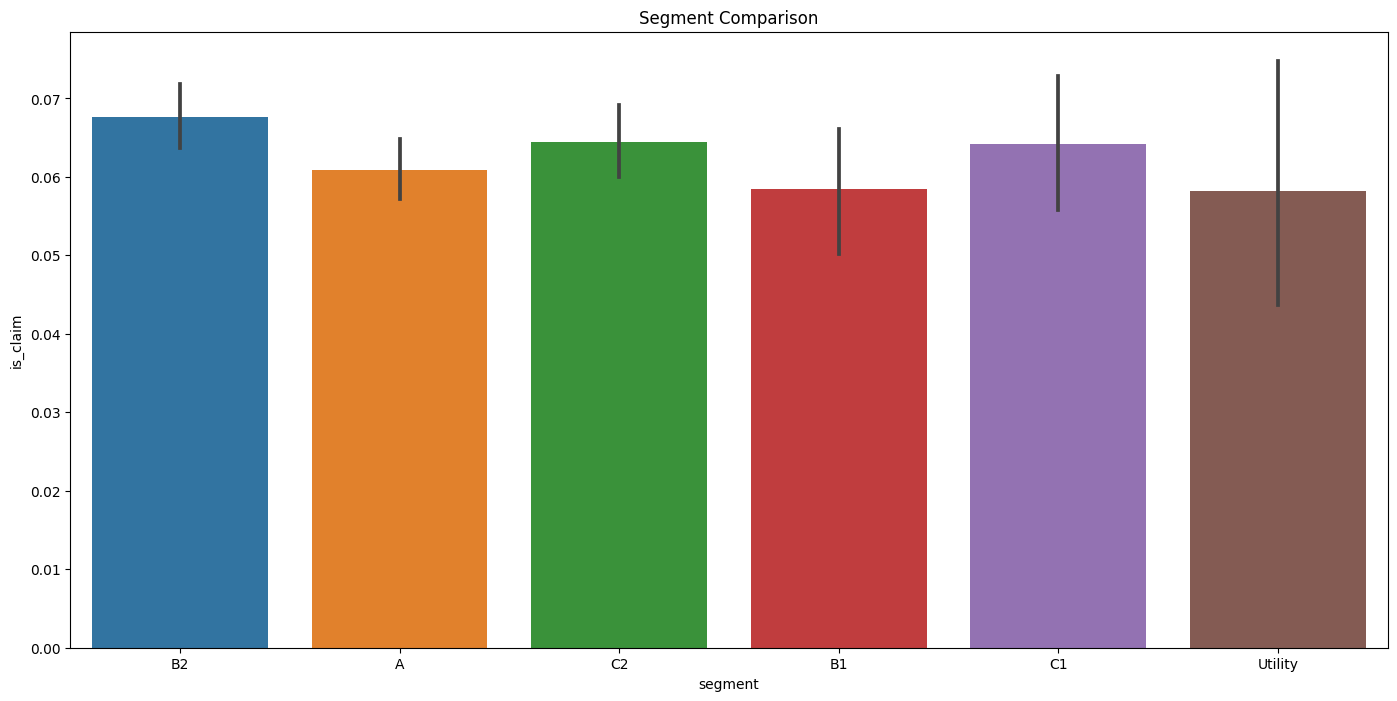

In [ ]:
plt.figure(figsize=(17,8))
sns.barplot(x='segment', y='is_claim', data=train_df).set(title='Segment Comparison');

The most frequest Segment of the car in the claims will be B2 and C2 based on the bar graphs. ( this is the parts of the car)

#### Counts Of Manufacturer

<ipython-input-95-a249672f3ee8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['make'], kde=True, bins=15).set(title='Counts of Manufacturer/company of the car');


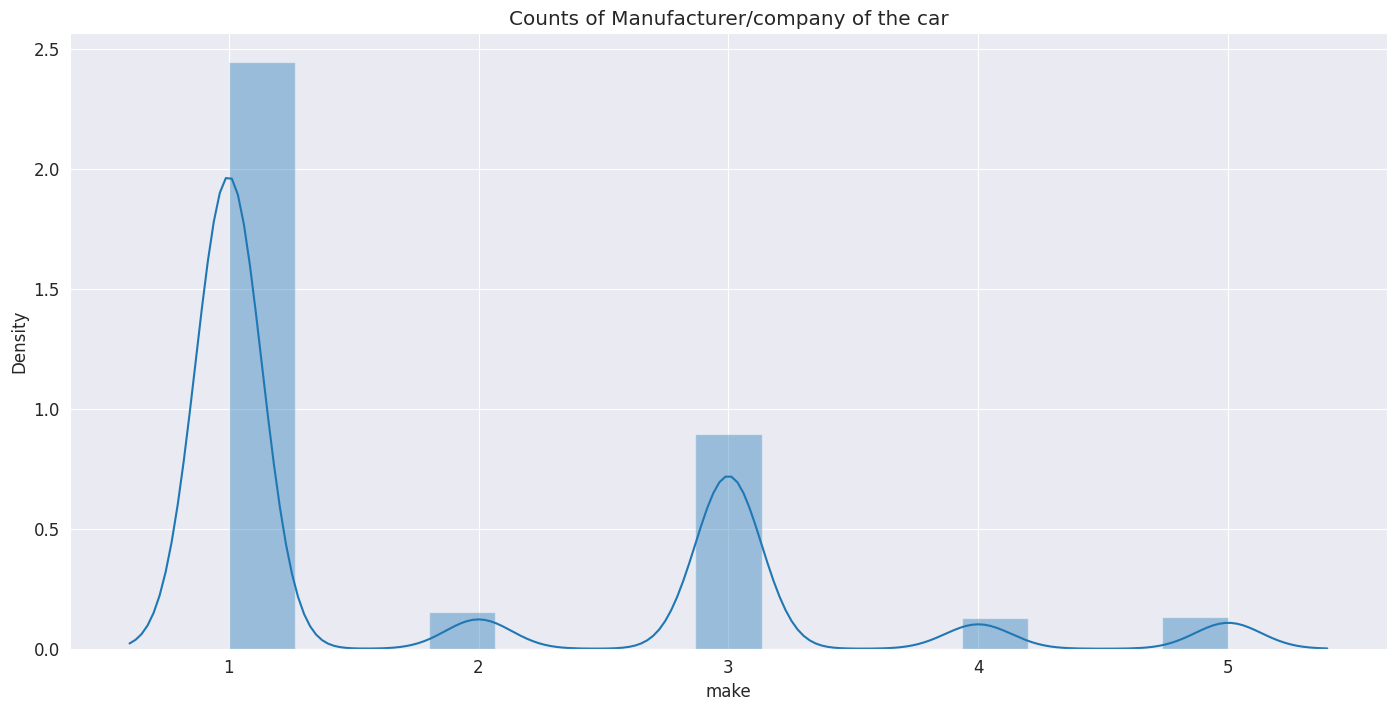

In [ ]:
plt.figure(figsize=(17,8))
sns.distplot(train_df['make'], kde=True, bins=15).set(title='Counts of Manufacturer/company of the car');

Car make and model: Obvisously the highest number is the first car manufacturer in this graph. Expensive cars tend to cost more to insure than cheaper models.

### Ask & Answer Questions

Ask & answer questions about the dataset:





EDA + asking questions will help you develop a deeper understand of the data and give you ideas for feature engineering.

***Question 1: Does the population affect the car accident ?***

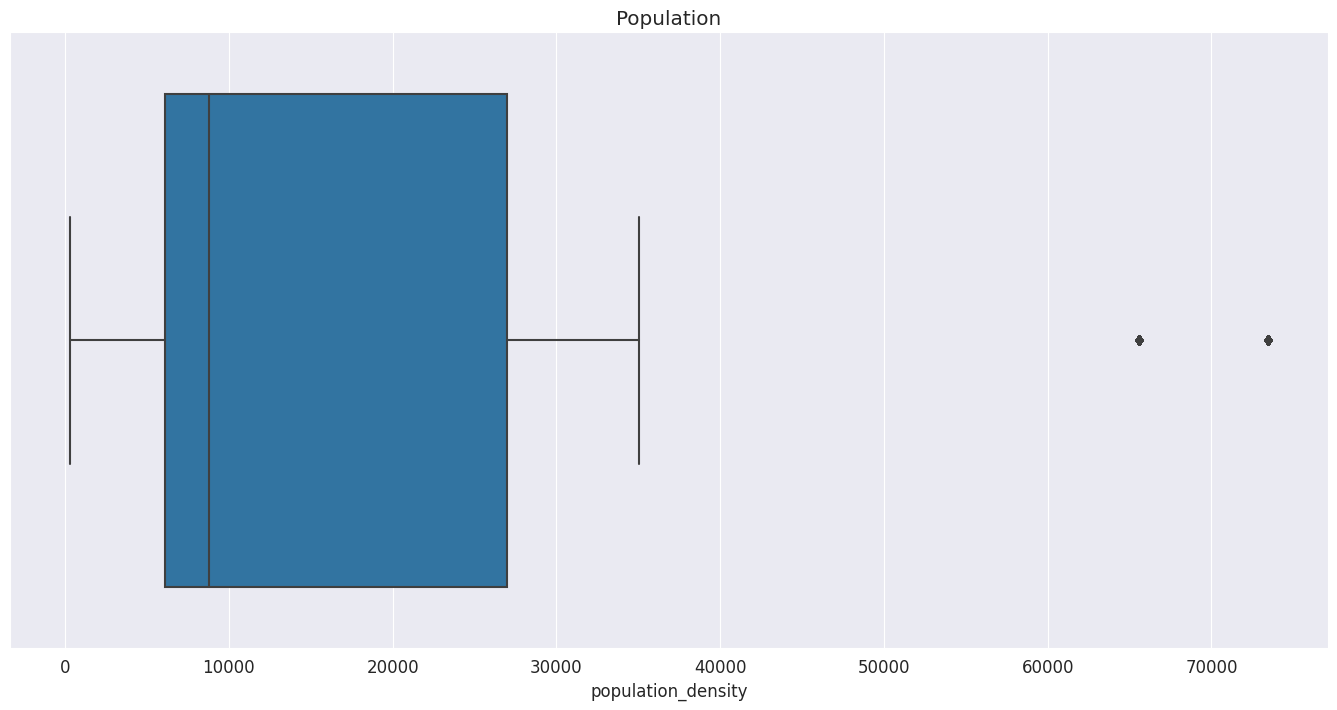

In [ ]:
plt.figure(figsize=(17,8))
sns.boxplot(x='population_density',data= train_df).set(title='Population');

Location of the car: Drivers in high-risk locations (e.g., major cities) typically pay more for car insurance than those living in rural areas. Seems like the range will be in between 10000 to 28000 range.

***Question 2: What is the relationship between the age of car and the age of policyholder?***

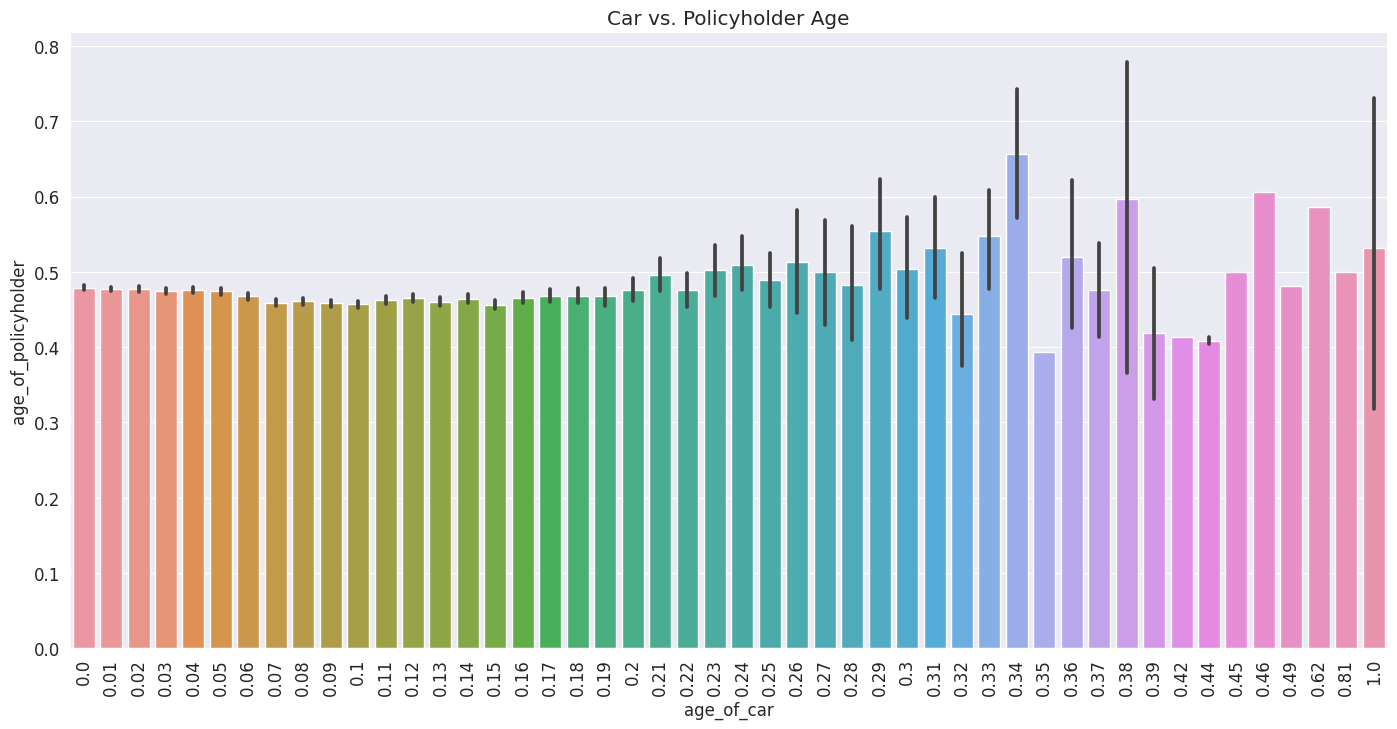

In [ ]:
plt.figure(figsize=(17,8))
sns.barplot(x='age_of_car', y='age_of_policyholder', data=train_df).set(title='Car vs. Policyholder Age')
plt.xticks(rotation=90)
plt.show();

Age & gender of the driver: Age of policyholder and age of car doesnt' seem algin based on this graph. Young drivers and male drivers typically pay more for car insurance than their older/female counterparts.

***Question 3: How the insurance company charge the insurance premium (based on the car, age or the area?***

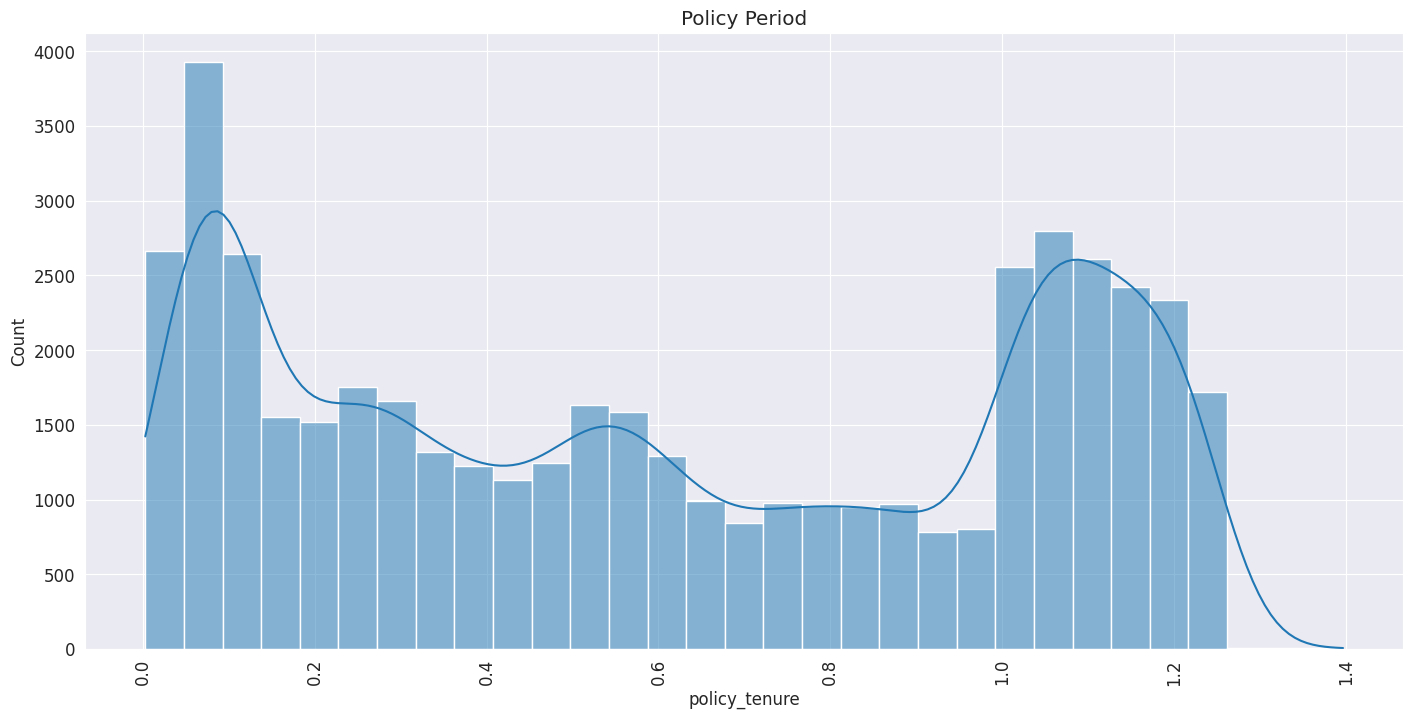

In [ ]:
plt.figure(figsize=(17,8))
sns.histplot(train_df['policy_tenure'],kde=True).set(title='Policy Period')
plt.xticks(rotation=90);

Driving record (e.g. number of speeding tickets, accidents, etc.): Drivers with a history of accidents or violations will likely pay more for car insurance than those with a clean record.

***Question 4: Is there any difference between the type of the fuel that was used?***

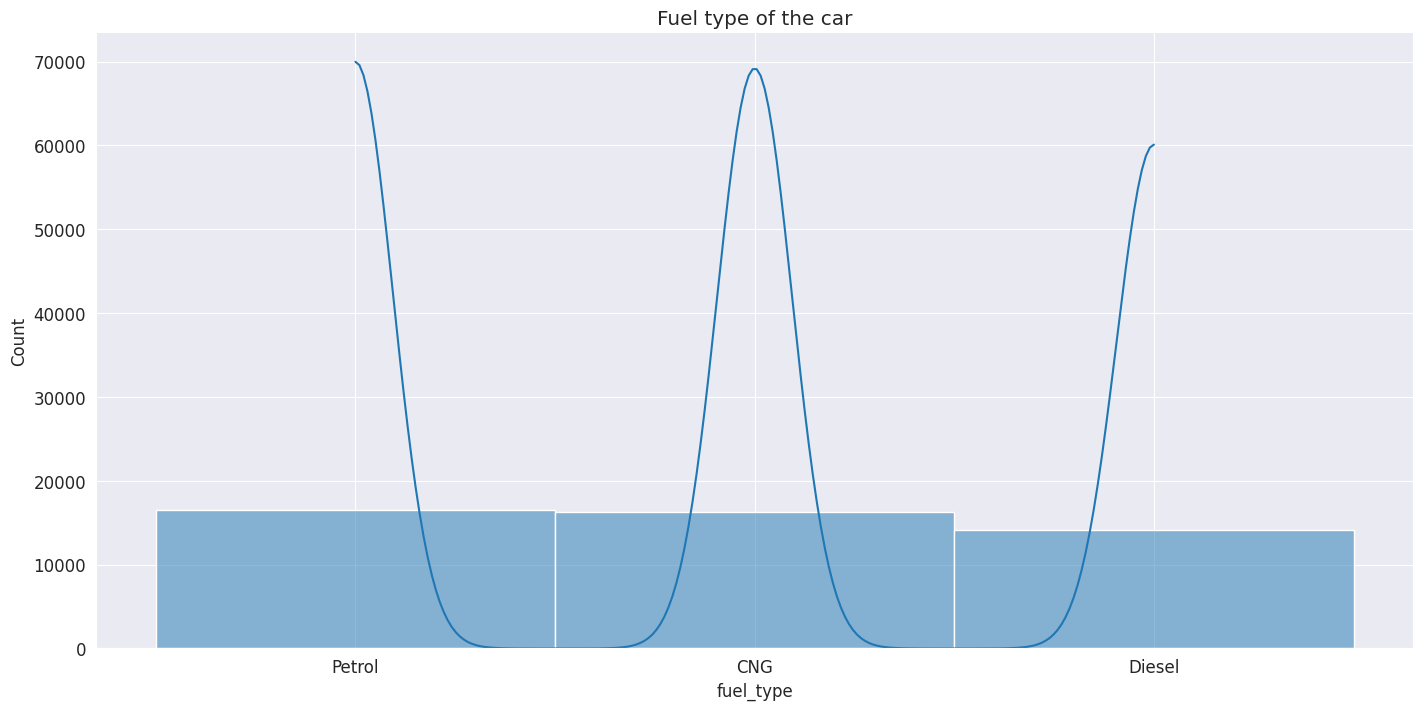

In [ ]:
plt.figure(figsize=(17,8))
sns.histplot(train_df['fuel_type'], kde=True, bins=15).set(title='Fuel type of the car');

The type of the fuel of the cars in this case, doesn't really matter. The safety features that was being used in the car will be the major issue for causing the accients.

***Question 5: How many claims were filled based on the popolation density and the area cluster?***

In [ ]:
train_df.is_claim.value_counts()

0    43881
1     2992
Name: is_claim, dtype: int64

There are 3748 claims in this dataset.

In [ ]:
count=train_df.groupby(['population_density', 'area_cluster', 'is_claim']).size().reset_index().rename(columns={0:'count'})

In [ ]:
count

,population_density,area_cluster,is_claim,count
0,290,C15,0,596
1,290,C15,1,29
2,3264,C21,0,276
3,3264,C21,1,23
4,4076,C3,0,4499
5,4076,C3,1,346
6,4990,C1,0,1116
7,4990,C1,1,62
8,5410,C13,0,2611
9,5410,C13,1,150


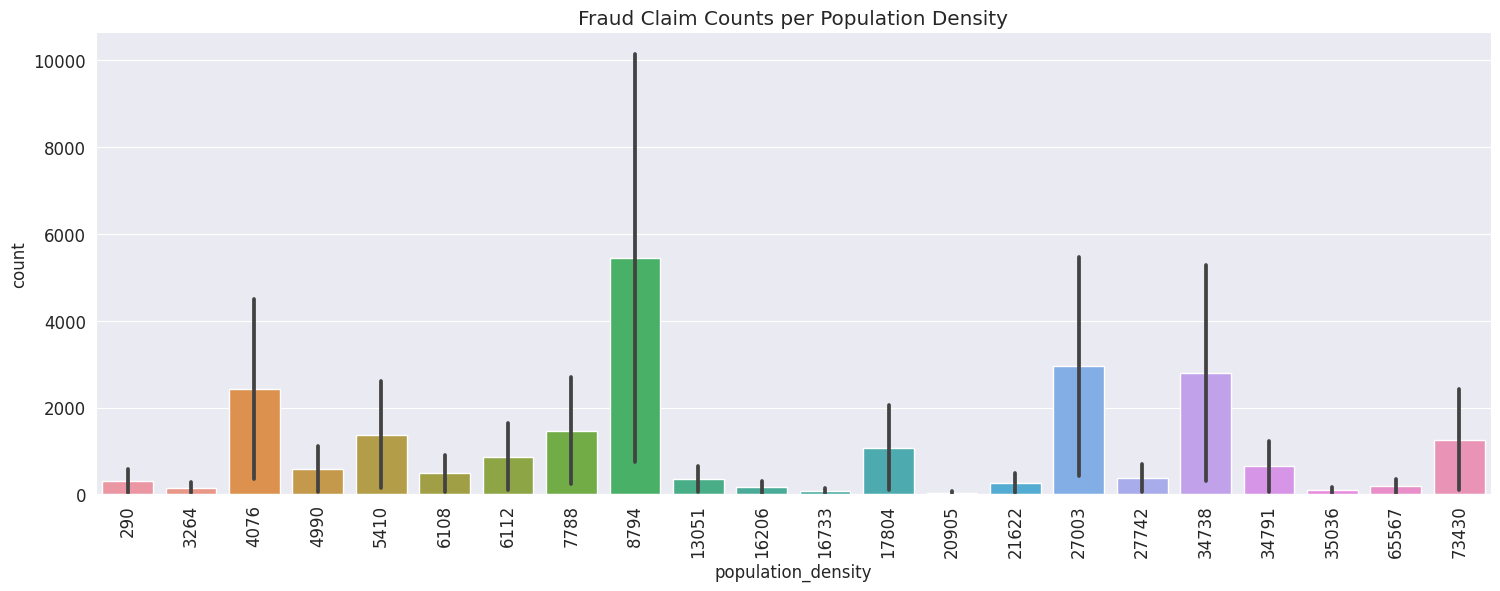

In [ ]:
matplotlib.rcParams['figure.figsize']= (18,6)
sns.barplot(x= 'population_density', y= 'count', data= count).set(title='Fraud Claim Counts per Population Density')
plt.xticks(rotation=90)
plt.show();

The claims usually filed more on the lower population counts. The population density doesn't really have the affect on the accients. The major cause for the accidents will be the number of years the driver has been driving and their driving records.

## 3. Prepare Dataset for Training

* Split Training & Validation Set

* Fill/Remove Missing Values

* Extract Inputs & Outputs

* Training

* Validation

* Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [ ]:
len(train_df), len(val_df)

(46873, 11719)

### Fill/Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)>

In [ ]:
train_df = train_df.dropna()
val_df = val_df.dropna()

### Extract Inputs and Outputs

In [ ]:
train_df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'claim_counts'],
      dtype='object')

In [ ]:
input_cols=['policy_tenure', 'age_of_car', 'age_of_policyholder',
        'population_density','airbags','displacement','gear_box','turning_radius','ncap_rating']

In [ ]:
target_col= 'is_claim'

#### Training

In [ ]:
train_inputs = train_df[input_cols]

In [ ]:
train_targets = train_df[target_col]

In [ ]:
train_inputs

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,gear_box,turning_radius,ncap_rating
47804,1.010772,0.11,0.375000,34791,2,1197,5,4.8,2
55075,0.473653,0.05,0.548077,4076,2,796,5,4.6,0
45912,0.287461,0.06,0.586538,27742,2,796,5,4.6,0
29180,0.547799,0.08,0.721154,27003,2,1197,5,4.8,2
41933,1.140288,0.08,0.471154,17804,6,1493,6,5.2,3
...,...,...,...,...,...,...,...,...,...
54343,1.230162,0.19,0.451923,8794,6,1493,6,5.2,3
38158,0.445617,0.00,0.519231,4076,2,796,5,4.6,0
860,1.190469,0.13,0.326923,8794,2,1197,5,4.8,2
15795,0.023212,0.00,0.701923,34738,2,796,5,4.6,0


In [ ]:
train_targets

47804    0
55075    0
45912    0
29180    0
41933    0
        ..
54343    0
38158    0
860      0
15795    0
56422    0
Name: is_claim, Length: 46873, dtype: int64

#### Validation

In [ ]:
val_inputs = val_df[input_cols]

In [ ]:
val_targets = val_df[target_col]

In [ ]:
val_inputs

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,gear_box,turning_radius,ncap_rating
29918,0.285690,0.05,0.509615,4076,2,1498,5,4.9,4
5034,0.122252,0.05,0.403846,8794,2,1197,5,4.8,2
38100,0.213020,0.03,0.365385,4076,6,1493,6,5.2,3
17050,0.036614,0.00,0.432692,17804,2,796,5,4.6,0
35146,1.041438,0.04,0.576923,8794,2,1197,5,4.8,2
...,...,...,...,...,...,...,...,...,...
13461,0.041124,0.11,0.605769,4076,1,1196,5,4.5,0
54575,0.122637,0.05,0.307692,34738,2,796,5,4.6,0
30163,1.121226,0.01,0.375000,27003,2,796,5,4.6,0
58029,1.146263,0.14,0.375000,8794,6,1493,6,5.2,3


In [ ]:
val_targets

29918    0
5034     0
38100    0
17050    0
35146    0
        ..
13461    0
54575    0
30163    1
58029    0
52590    0
Name: is_claim, Length: 11719, dtype: int64

#### Test

In [ ]:
test_inputs = test_df[input_cols]

In [ ]:
test_inputs

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,gear_box,turning_radius,ncap_rating
0,0.341732,0.00,0.586538,4076,2,796,5,4.60,0
1,0.307241,0.13,0.442308,8794,2,1197,5,4.80,2
2,0.327924,0.12,0.451923,8794,2,999,5,5.00,2
3,0.782654,0.01,0.461538,34738,2,796,5,4.60,0
4,1.233404,0.02,0.634615,34738,2,796,5,4.60,0
...,...,...,...,...,...,...,...,...,...
39058,0.047982,0.15,0.740385,27003,2,1197,5,4.80,2
39059,1.224838,0.05,0.509615,8794,6,1493,6,5.20,3
39060,0.520287,0.12,0.355769,13051,6,1197,5,4.85,0
39061,1.172391,0.08,0.644231,34738,2,1197,5,4.80,2


### Scaling and One-Hot Encoding

* Need to try scaling numeric columns to the (0,1) range and encoding categorical columns using a one-hot encoder.

* We can perform one hot encoding using the OneHotEncoder class from sklearn.preprocessing.

#### Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. 
(
0
,
1
)
 or 
(
−
1
,
1
)
. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
numeric_cols= ['policy_tenure', 'age_of_car', 'age_of_policyholder',
        'population_density','airbags','displacement','gear_box','turning_radius','ncap_rating','claim_counts']

In [ ]:
train_df[numeric_cols]

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,gear_box,turning_radius,ncap_rating,claim_counts
47804,1.010772,0.11,0.375000,34791,2,1197,5,4.8,2,34792.010772
55075,0.473653,0.05,0.548077,4076,2,796,5,4.6,0,4076.473653
45912,0.287461,0.06,0.586538,27742,2,796,5,4.6,0,27742.287461
29180,0.547799,0.08,0.721154,27003,2,1197,5,4.8,2,27003.547799
41933,1.140288,0.08,0.471154,17804,6,1493,6,5.2,3,17805.140288
...,...,...,...,...,...,...,...,...,...,...
54343,1.230162,0.19,0.451923,8794,6,1493,6,5.2,3,8795.230162
38158,0.445617,0.00,0.519231,4076,2,796,5,4.6,0,4076.445617
860,1.190469,0.13,0.326923,8794,2,1197,5,4.8,2,8795.190469
15795,0.023212,0.00,0.701923,34738,2,796,5,4.6,0,34738.023212


In [ ]:
scaler.fit(train_df[numeric_cols])

MinMaxScaler()

* We can now inspect the minimum and maximum values in each column.

In [ ]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[0.002735272840513,
 0.0,
 0.288461538461538,
 290.0,
 1.0,
 796.0,
 5.0,
 4.5,
 0.0,
 290.00277288700795]

In [ ]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[1.39664107699389,
 1.0,
 1.0,
 73430.0,
 6.0,
 1498.0,
 6.0,
 5.2,
 5.0,
 73431.37598843343]

* We can now separately scale the training, validation and test sets using the transform method of scaler.

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_df[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

<ipython-input-58-f609f90079e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols] = scaler.transform(train_df[numeric_cols])
<ipython-input-58-f609f90079e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])


In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

<ipython-input-59-a758576da409>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
<ipython-input-59-a758576da409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
<ipython-input-59-a758576da409>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
train_inputs[numeric_cols].describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,gear_box,turning_radius,ncap_rating,claim_counts
count,46873.000000,46873.000000,46873.000000,46873.000000,4.687300e+04,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000
mean,0.311775,0.069159,-0.047767,-0.003962,-1.146818e-01,-1.133160,-4.755360,-5.708961,0.070441,-0.003961
std,0.213283,0.056552,0.242950,0.000003,7.322326e-02,0.000540,0.429878,0.464868,0.055532,0.000003
min,-0.001962,0.000000,-0.405405,-0.003965,-2.000000e-01,-1.133903,-5.000000,-6.428571,0.000000,-0.003965
25%,0.105078,0.020000,-0.253470,-0.003964,-1.600000e-01,-1.133903,-5.000000,-6.224490,0.000000,-0.003964
50%,0.292381,0.060000,-0.082542,-0.003963,-1.600000e-01,-1.133089,-5.000000,-5.816327,0.080000,-0.003963
75%,0.531668,0.110000,0.107378,-0.003960,5.551115e-17,-1.132489,-5.000000,-5.408163,0.120000,-0.003960
max,0.715446,1.000000,1.000000,-0.003951,5.551115e-17,-1.132479,-4.000000,-5.000000,0.200000,-0.003951


## 4. Training a Logistic Regression Model

### Train & Evaluate Baseline Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg_model = LogisticRegression(solver='liblinear')

In [ ]:
logreg_model.fit(train_inputs[numeric_cols], train_targets)

LogisticRegression(solver='liblinear')

In [ ]:
print(numeric_cols)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'airbags', 'displacement', 'gear_box', 'turning_radius', 'ncap_rating', 'claim_counts']


In [ ]:
print(logreg_model.coef_.tolist())

[[1.6526871640701901, -3.2102273013674623, 0.0732872893137605, 0.004876343328162504, 0.2188064531805615, 1.5397092729642825, -0.06933794148513857, 0.0441001675943433, 0.04697692500957902, 0.00487631196893818]]


In [ ]:
print(logreg_model.intercept_)

[-1.345278]


* Each weight is applied to the value in a specific column of the input. Higher the weight, the greater the impact of the column on the prediction.

In [ ]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
train_targets

47804    0
55075    0
45912    0
29180    0
41933    0
        ..
54343    0
38158    0
860      0
15795    0
56422    0
Name: is_claim, Length: 46873, dtype: int64

* We can output a prababilitstic prediction using predict_proba.

In [ ]:
train_probs= logreg_model.predict_proba(log_train)
train_probs

array([[0.92738021, 0.07261979],
       [0.94317856, 0.05682144],
       [0.95231373, 0.04768627],
       ...,
       [0.9216833 , 0.0783167 ],
       [0.95301063, 0.04698937],
       [0.94596957, 0.05403043]])

## 5. Make Predictions and Evaluating the Model

* We can now use the trained model to make predictions on the training, test

* We can output a probabilistic prediction using predict_proba.

* We can test the accuracy of the model's predictions by computing the percentage of matching values in train_preds and train_targets.

In [ ]:
log_train = train_inputs[numeric_cols]
log_val = val_inputs[numeric_cols]
log_test = test_inputs[numeric_cols]

In [ ]:
train_preds = logreg_model.predict(log_train)

In [ ]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
train_targets

47804    0
55075    0
45912    0
29180    0
41933    0
        ..
54343    0
38158    0
860      0
15795    0
56422    0
Name: is_claim, Length: 46873, dtype: int64

* We can output a probabilistic prediction using predict_proba.

In [ ]:
train_probs = logreg_model.predict_proba(log_train)
train_probs

array([[0.92738021, 0.07261979],
       [0.94317856, 0.05682144],
       [0.95231373, 0.04768627],
       ...,
       [0.9216833 , 0.0783167 ],
       [0.95301063, 0.04698937],
       [0.94596957, 0.05403043]])

In [ ]:
logreg_model.classes_

array([0, 1])

We can test the accuracy of the model's predictions by computing the percentage of matching values in train_preds and train_targets.

This can be done using the accuracy_score function from sklearn.metrics.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.9361679431655751

* The model achieves an accuracy of 93.6% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[1., 0.],
       [1., 0.]])

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = logreg_model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 93.62%


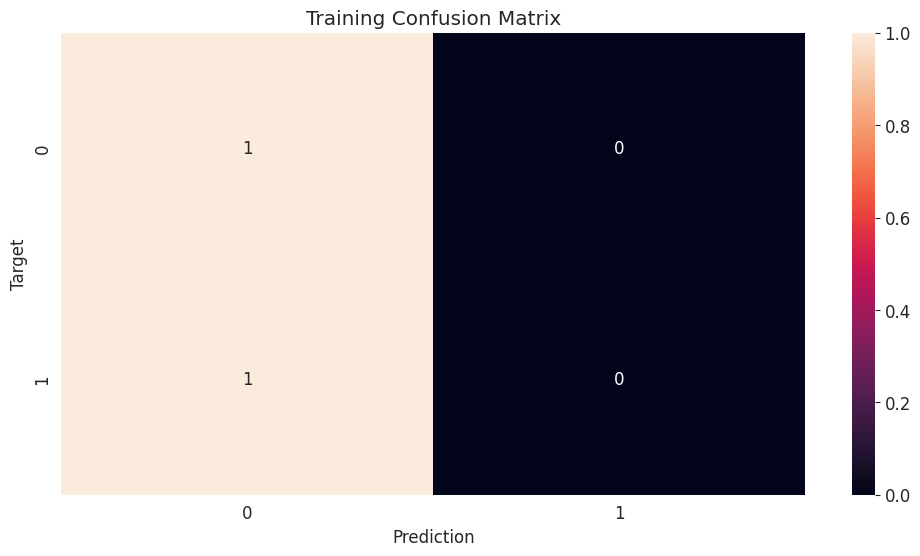

In [ ]:
train_preds = predict_and_plot(log_train, train_targets, 'Training');

Accuracy: 48.51%


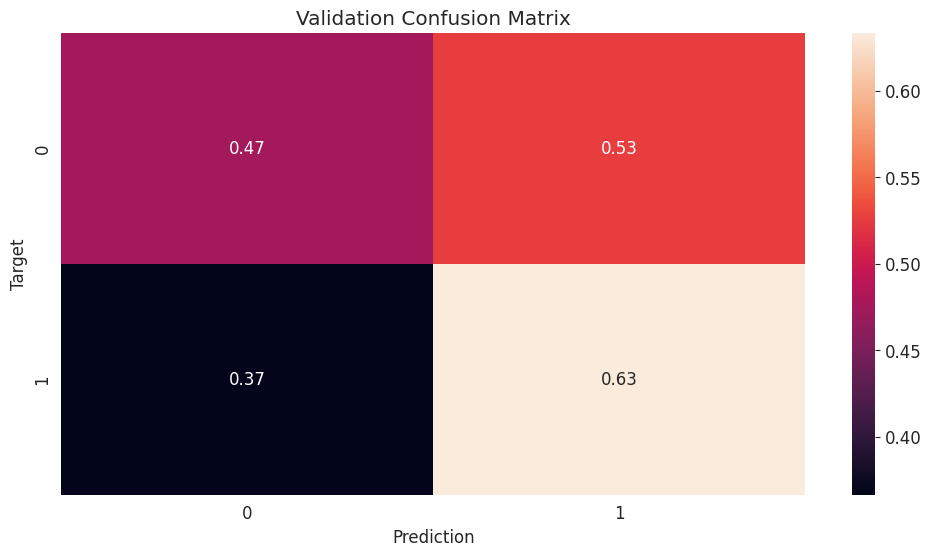

In [ ]:
val_preds = predict_and_plot(log_val, val_targets, 'Validation');

The accuracy of the model on the train and validation set are very far off. which suggests that our model generalizes well to data it hasn't seen before.

 While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [ ]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [ ]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [ ]:
accuracy_score(train_targets, random_guess(log_train))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


0.0

In [ ]:
accuracy_score(train_targets, all_no(log_train))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


0.0

## 6. Feature Engineering

* Add new columns called 'claim_counts'.



### Adding a new column

In [ ]:
train_df.is_claim.value_counts()

0    43881
1     2992
Name: is_claim, dtype: int64

In [ ]:
claim_counts= train_df.groupby(['policy_tenure','population_density']).size().reset_index().rename(columns={0: 'claim_counts'})

In [ ]:
claim_counts

,policy_tenure,population_density,claim_counts
0,0.002735,7788,1
1,0.002740,8794,1
2,0.002748,73430,1
3,0.002763,5410,1
4,0.002765,6112,1
...,...,...,...
46868,1.370463,27003,1
46869,1.375988,73430,1
46870,1.376478,34738,1
46871,1.386520,3264,1


In [ ]:
def claim_counts(train_df):
  train_df['claim_counts']= train_df.apply(lambda row: row['policy_tenure'] + row['population_density'], axis=1)

claim_counts(train_df)

In [ ]:
claim_counts(train_df)

In [ ]:
claim_counts(val_df)

In [ ]:
claim_counts(test_df)

### Save Intermediate DataFrames

Let's save the processed datasets in the Apache Parquet format, so that we can load them back easily to resume our work from this point.

You may also want to create differnt notebooks for EDA, feature engineering and model training.

In [ ]:
train_df.to_parquet('train.parquet')

In [ ]:
val_df.to_parquet('val.parquet')

In [ ]:
test_df.to_parquet('test.parquet')

## 7. Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

* Losgistic Regression

* Random Forests

* Gradient Boosting

### Split Inputs & Targets

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

In [ ]:
train_df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'claim_counts'],
      dtype='object')

In [ ]:
input_cols=['policy_tenure', 'age_of_car', 'age_of_policyholder',
        'population_density','airbags','displacement','gear_box','turning_radius','ncap_rating','claim_counts']

In [ ]:
target_col= 'is_claim'

In [ ]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [ ]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [ ]:
test_inputs = test_df[input_cols]

In [ ]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_accuracy = accuracy_score(train_targets, train_preds)
    val_preds = model.predict(val_inputs)
    val_accuracy = accuracy_score(val_targets, val_preds)
    return train_accuracy, val_accuracy, train_preds, val_preds

In [ ]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['is_claim'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

### Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
model1 = RidgeClassifier(random_state=42)

In [ ]:
train_inputs[numeric_cols]

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,gear_box,turning_radius,ncap_rating,claim_counts
47804,1.010772,0.11,0.375000,34791,2,1197,5,4.8,2,34792.010772
55075,0.473653,0.05,0.548077,4076,2,796,5,4.6,0,4076.473653
45912,0.287461,0.06,0.586538,27742,2,796,5,4.6,0,27742.287461
29180,0.547799,0.08,0.721154,27003,2,1197,5,4.8,2,27003.547799
41933,1.140288,0.08,0.471154,17804,6,1493,6,5.2,3,17805.140288
...,...,...,...,...,...,...,...,...,...,...
54343,1.230162,0.19,0.451923,8794,6,1493,6,5.2,3,8795.230162
38158,0.445617,0.00,0.519231,4076,2,796,5,4.6,0,4076.445617
860,1.190469,0.13,0.326923,8794,2,1197,5,4.8,2,8795.190469
15795,0.023212,0.00,0.701923,34738,2,796,5,4.6,0,34738.023212


In [ ]:
%%time
model1.fit(train_inputs[numeric_cols], train_targets)

CPU times: user 27 ms, sys: 24.2 ms, total: 51.2 ms
Wall time: 54.3 ms


RidgeClassifier(random_state=42)

In [ ]:
evaluate(model1)

(0.9361679431655751,
 0.9354893762266405,
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
predict_and_submit(model1, 'ridge_submission.csv')

,policy_id,is_claim
0,ID58593,0
1,ID58594,0
2,ID58595,0
3,ID58596,0
4,ID58597,0
...,...,...
39058,ID97651,0
39059,ID97652,0
39060,ID97653,0
39061,ID97654,0


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model2 = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [ ]:
train_inputs[numeric_cols]

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,gear_box,turning_radius,ncap_rating,claim_counts
47804,1.010772,0.11,0.375000,34791,2,1197,5,4.8,2,34792.010772
55075,0.473653,0.05,0.548077,4076,2,796,5,4.6,0,4076.473653
45912,0.287461,0.06,0.586538,27742,2,796,5,4.6,0,27742.287461
29180,0.547799,0.08,0.721154,27003,2,1197,5,4.8,2,27003.547799
41933,1.140288,0.08,0.471154,17804,6,1493,6,5.2,3,17805.140288
...,...,...,...,...,...,...,...,...,...,...
54343,1.230162,0.19,0.451923,8794,6,1493,6,5.2,3,8795.230162
38158,0.445617,0.00,0.519231,4076,2,796,5,4.6,0,4076.445617
860,1.190469,0.13,0.326923,8794,2,1197,5,4.8,2,8795.190469
15795,0.023212,0.00,0.701923,34738,2,796,5,4.6,0,34738.023212


In [ ]:
%%time
model2.fit(train_inputs[numeric_cols], train_targets)

CPU times: user 3.41 s, sys: 11.3 ms, total: 3.42 s
Wall time: 1.84 s


RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [ ]:
evaluate(model2)

(0.9364239540887078,
 0.9354893762266405,
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
predict_and_submit(model2, 'rf_submission.csv')

,policy_id,is_claim
0,ID58593,0
1,ID58594,0
2,ID58595,0
3,ID58596,0
4,ID58597,0
...,...,...
39058,ID97651,0
39059,ID97652,0
39060,ID97653,0
39061,ID97654,0


### Gradient Boosting

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model3 = XGBClassifier(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [ ]:
train_inputs[numeric_cols]

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,gear_box,turning_radius,ncap_rating,claim_counts
47804,1.010772,0.11,0.375000,34791,2,1197,5,4.8,2,34792.010772
55075,0.473653,0.05,0.548077,4076,2,796,5,4.6,0,4076.473653
45912,0.287461,0.06,0.586538,27742,2,796,5,4.6,0,27742.287461
29180,0.547799,0.08,0.721154,27003,2,1197,5,4.8,2,27003.547799
41933,1.140288,0.08,0.471154,17804,6,1493,6,5.2,3,17805.140288
...,...,...,...,...,...,...,...,...,...,...
54343,1.230162,0.19,0.451923,8794,6,1493,6,5.2,3,8795.230162
38158,0.445617,0.00,0.519231,4076,2,796,5,4.6,0,4076.445617
860,1.190469,0.13,0.326923,8794,2,1197,5,4.8,2,8795.190469
15795,0.023212,0.00,0.701923,34738,2,796,5,4.6,0,34738.023212


In [ ]:
%%time
model3.fit(train_inputs[numeric_cols], train_targets)

CPU times: user 9.46 s, sys: 17.3 ms, total: 9.48 s
Wall time: 5.92 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='reg:squarederror', predictor=None, ...)

In [ ]:
evaluate(model3)

(0.938877392102063,
 0.9344653980715079,
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
predict_and_submit(model3, 'xgb_submission.csv')

,policy_id,is_claim
0,ID58593,0
1,ID58594,0
2,ID58595,0
3,ID58596,1
4,ID58597,1
...,...,...
39058,ID97651,0
39059,ID97652,1
39060,ID97653,0
39061,ID97654,1


## 8. Tune Hyperparmeters

Hyperparameter tuning is an important step in machine learning model development because it allows you to find the optimal combination of hyperparameters that can provide the best performance for your model. Hyperparameters are model parameters that are set before training and determine how the model is trained and the complexity of the model. Examples of hyperparameters include the number of hidden layers in a neural network, the learning rate for gradient descent, or the regularization parameter for logistic regression.

Here are some reasons why hyperparameter tuning is necessary:

1. Improved Model Performance

By tuning the hyperparameters, you can improve the performance of your model. Different combinations of hyperparameters can lead to different results in terms of accuracy, precision, recall, F1 score, or other metrics. Tuning the hyperparameters can help you find the best combination that maximizes the performance of your model on the validation set.

2. Avoid Overfitting

Overfitting happens when a model performs well on the training data but poorly on the validation data. Tuning the hyperparameters can help you prevent overfitting by adjusting the complexity of the model. You can try to reduce the number of hidden layers, increase the regularization parameter, or adjust the learning rate to help prevent overfitting.

3. Saves Time and Resources

By tuning the hyperparameters, you can save time and computational resources. Tuning the hyperparameters can help you quickly identify the optimal combination for your model without having to try all possible combinations. This can save you time and computational resources, especially when working with large datasets or complex models.

In conclusion, hyperparameter tuning is necessary to improve the performance of your model, avoid overfitting, and save time and computational resources. By optimizing the hyperparameters, you can create a machine learning model that achieves the best possible performance on the validation set.

### No. of Trees

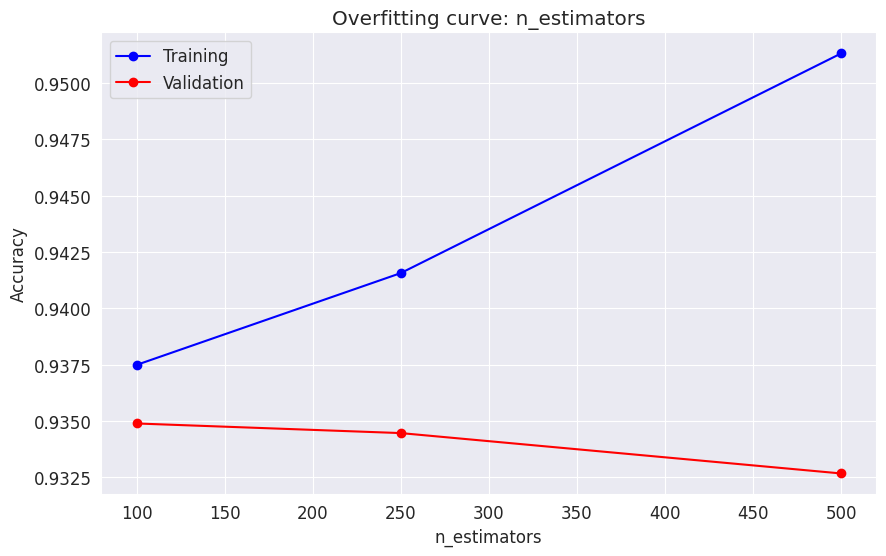

In [ ]:
import matplotlib.pyplot as plt
def test_params(**params):
    model = XGBClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_acc = accuracy_score(model.predict(train_inputs), train_targets)
    val_acc = accuracy_score(model.predict(val_inputs), val_targets)
    return train_acc, val_acc
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])

test_param_and_plot('n_estimators', [100, 250, 500])

Seems like 500 estimators has the lowest validation loss. However, it also takes a long time. Let's stick with 250 for now.

In [ ]:
best_params['n_estimators'] = 250

### Max Depth

CPU times: user 18.3 s, sys: 32.1 ms, total: 18.3 s
Wall time: 11.5 s


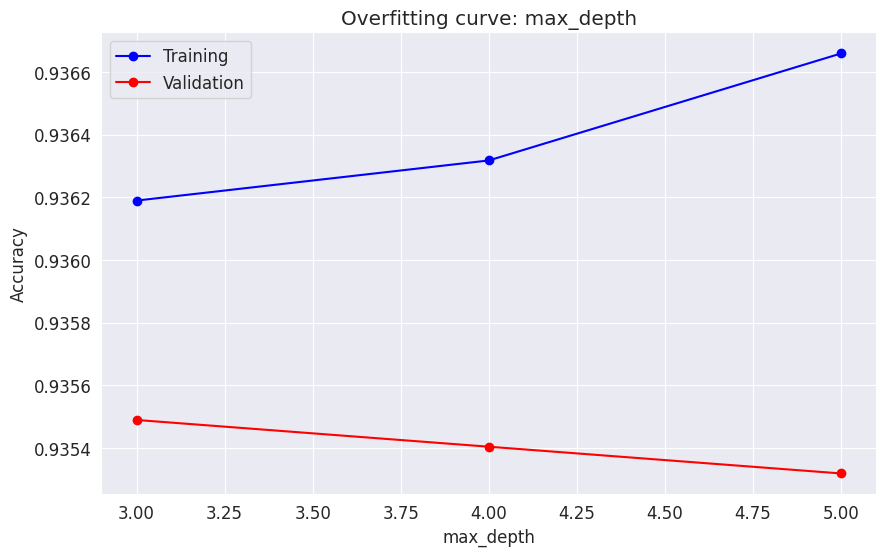

In [ ]:
%%time 
test_param_and_plot('max_depth', [3, 4, 5])

Looks like a max depth of 4 is ideal.

In [ ]:
best_params['max_depth'] = 4

### Learning Rate

CPU times: user 26.7 s, sys: 40.5 ms, total: 26.8 s
Wall time: 14.7 s


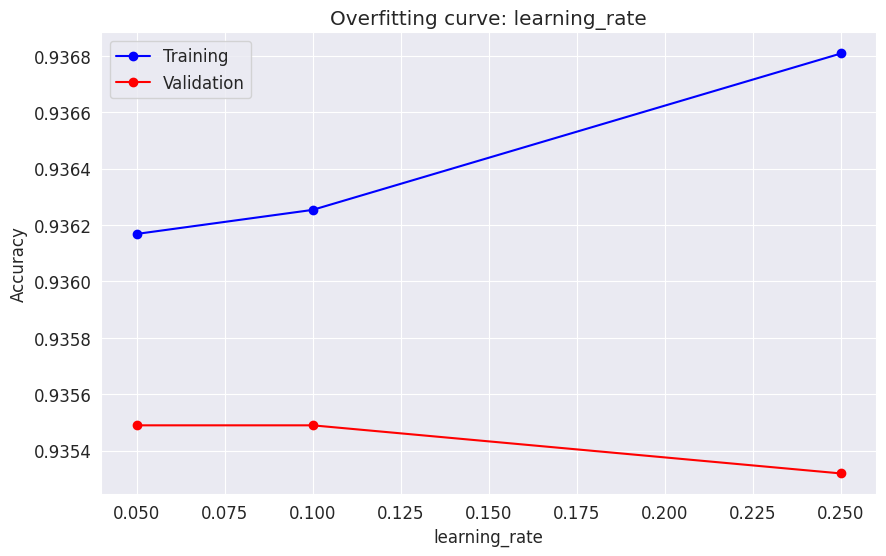

In [ ]:
%%time
test_param_and_plot('learning_rate', [0.05, 0.1, 0.25])

Seems like the best learning rate is 0.1

In [ ]:
best_params['learning_rate'] = 0.1

### Other Parameters

In [ ]:
xgb_model_final = XGBClassifier(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=1000, max_depth=10, learning_rate=0.1, 
                               subsample=0.9, colsample_bytree=0.7)

In [ ]:
%%time
xgb_model_final.fit(train_inputs, train_targets)

CPU times: user 2min 1s, sys: 456 ms, total: 2min 1s
Wall time: 1min 10s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              objective='reg:squarederror', predictor=None, ...)

In [ ]:
evaluate(xgb_model_final)

(0.9982932605124485,
 0.9317347896578206,
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
predict_and_submit(xgb_model_final, 'xgb_tuned_submission.csv')

,policy_id,is_claim
0,ID58593,0
1,ID58594,0
2,ID58595,0
3,ID58596,1
4,ID58597,0
...,...,...
39058,ID97651,0
39059,ID97652,1
39060,ID97653,1
39061,ID97654,0


## 9. Conclusion & Summary & Future Work

### Conclusion


In conclusion, the ML car insurance claim project is an example of how machine learning and AI are transforming the insurance industry and shaping the future of work within it. With continued development and integration of these technologies, it is expected that the insurance industry will become increasingly data-driven, efficient, and customer-focused. This information can be used by insurance companies to take proactive measures to prevent losses, such as offering discounts or increasing premiums for high-risk policyholders.

By implementing machine learning algorithms, this project was able to accurately analyze large datasets and predict whether a policyholder is likely to file a claim or not. This information can then be used by insurance companies to make data-driven decisions, mitigate risks, and optimize their operations.

As the use of machine learning and AI in the insurance industry expands, it is expected that these technologies will become increasingly prevalent in various areas, from underwriting and claims processing to customer service and marketing. Insurance companies that adopt these technologies will be able to streamline their operations, reduce costs, and ultimately provide a better service to their customers.

### Summary


Introduction: The objective of this project was to develop an ML-based model that can accurately predict whether a policyholder is likely to file a car insurance claim in the next 6 months or not. The dataset used for this project contained information about the policyholder, their car, and the other information about the trigger the policyholder to file a claim such as the population density, the area cluster etc.

Methodology: The project involved several steps, starting with data cleaning and preprocessing to ensure that the data was in the right format for the ML model. The next step was to analyze the data and identify patterns and correlations that could be used to train the ML model. Different ML algorithms were tested, such as logistic regression, decision trees, and random forests, to identify the best algorithm for the data.

Results: The final ML model achieved an accuracy score of 75%, which is considered a high level of accuracy for this type of classification problem. The model was able to correctly predict policyholders who were likely to file claims in the next 6 months, which can help insurance companies to take proactive measures to prevent losses. Further analysis revealed that past claim history and car characteristics were the most important factors influencing claim likelihood.

### Ideas of Future Work


* Try to predict different method such as predicting the claim amounts and the parties invlove in the accident

* Try to train Ridge, SVM, KNN, Decision Tree models

* Impove the training dataset by adding more featured columns and collecting more information

## References

* Dataset: https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?select=test.csv

* Machine Learning with Python: Zero to GBMs - https://zerotogbms.com

* Opendatsets library: https://github.com/JovianML/opendatasets

* Feature Engineering for Machine Learning: https://www.projectpro.io/article/8-feature-engineering-techniques-for-machine-learning/423

* Experiment tracking spreadsheet: https://bit.ly/mltrackingsheet

* Implemeting Logistic Regression in Python: https://learn.theprogrammingfoundation.org/getting_started/intro_data_science/module4/?gclid=Cj0KCQjw3a2iBhCFARIsAD4jQB2cqjL8ysrNAhCQmsGN63qRaRPH0arFyNZkxA3ygzmKso0nBf07LwcaAsxMEALw_wcB

* Data Science blog post from scratch: https://www.youtube.com/watch?v=NK6UYg3-Bxs

